# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


# Import dataset as a pandas dataframe

In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

# Data exploration

Before building a classification model, it is essential to explore and understand the dataset to identify patterns, relationships, and potential preprocessing needs. This section focuses on analyzing the dataset’s structure, checking for missing values, visualizing distributions, and understanding feature correlations.

### Dataset Overview

We begin by displaying its first few rows to understand its structure and the type of data it contains.

In [4]:
# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Checking for Missing Values and duplicates
Missing data can impact model performance. We check for missing values to determine if any preprocessing steps, such as imputation or removal, are needed.

In [5]:
# Check for missing values
df.isnull().sum()


Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

We have no missing values :

In [6]:
df.duplicated().sum()


0

No duplicates

### Statistical Summary

Generating summary statistics provides insights into the range, mean, and distribution of numerical features.

In [7]:
# Summary statistics of numerical features
df.describe()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Data distribution

visualization : A bar plot can help visually assess whether the classes are balanced: 

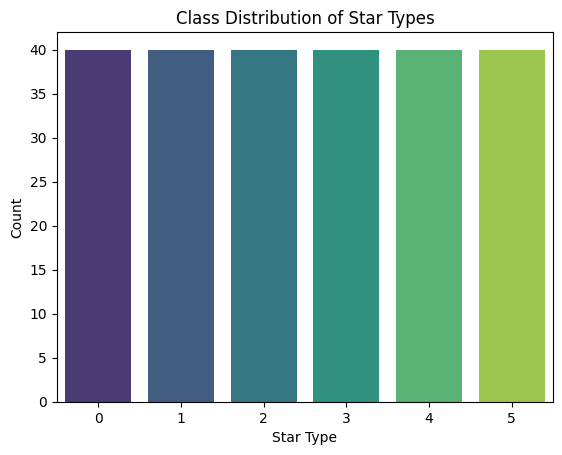

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each star type{}
sns.countplot(x=df['Star type'], palette='viridis')
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.title("Class Distribution of Star Types")
plt.show()


The dataset is well balanced between the different classes

### Feature Correlation Analysis

Encoding categorical variables as numerical to plot the correlation matrix

In [9]:
le_color = LabelEncoder()
df['Star color'] = le_color.fit_transform(df['Star color'])

le_spectral = LabelEncoder()
df['Spectral Class'] = le_spectral.fit_transform(df['Spectral Class'])

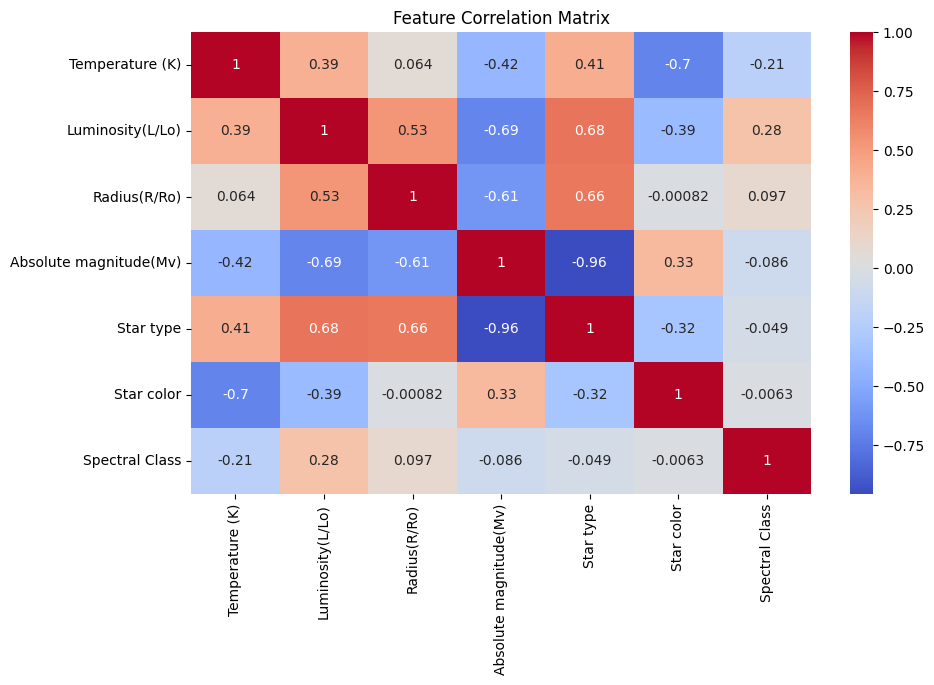

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Visualizing Feature Distributions

To understand how features vary across different star types, we use histograms and boxplots.

Temperature Distribution :


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


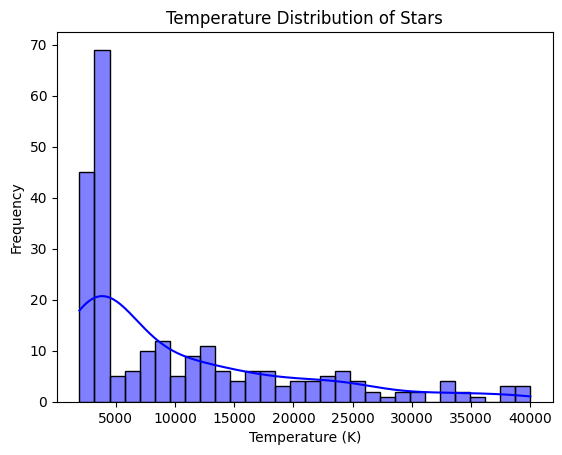

In [11]:
sns.histplot(df['Temperature (K)'], bins=30, kde=True, color='blue')
plt.title("Temperature Distribution of Stars")
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")
plt.show()


Luminosity vs. Star Type

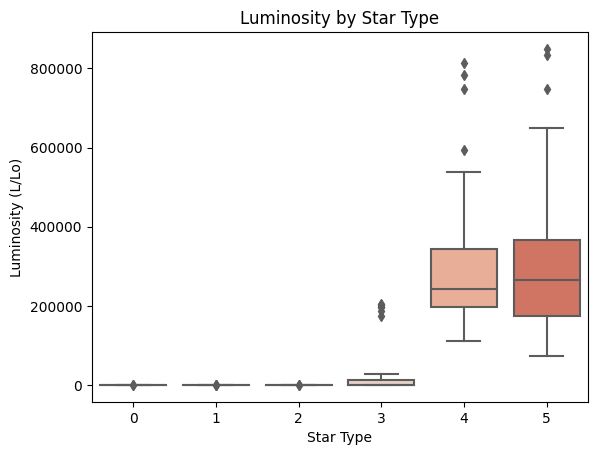

In [12]:
sns.boxplot(x=df['Star type'], y=df['Luminosity(L/Lo)'], palette='coolwarm')
plt.title("Luminosity by Star Type")
plt.xlabel("Star Type")
plt.ylabel("Luminosity (L/Lo)")
plt.show()


## Data cleaning

* Replace spaces with underscores
This ensures consistency and prevents issues when referencing columns in code.
* Rename specific columns
We remove the parentheses to make column names cleaner and easier to work with.

In [13]:
# Replace spaces with underscores
df.columns = df.columns.str.replace(" ", "_")

# Rename specific columns by removing parentheses
df.rename(columns={
    "Temperature_(K)": "Temperature",
    "Luminosity(L/Lo)": "Luminosity",
    "Radius(R/Ro)": "Radius",
    "Absolute_magnitude(Mv)": "Absolute_magnitude"
}, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude',
       'Star_type', 'Star_color', 'Spectral_Class'],
      dtype='object')


## Outliers analysis

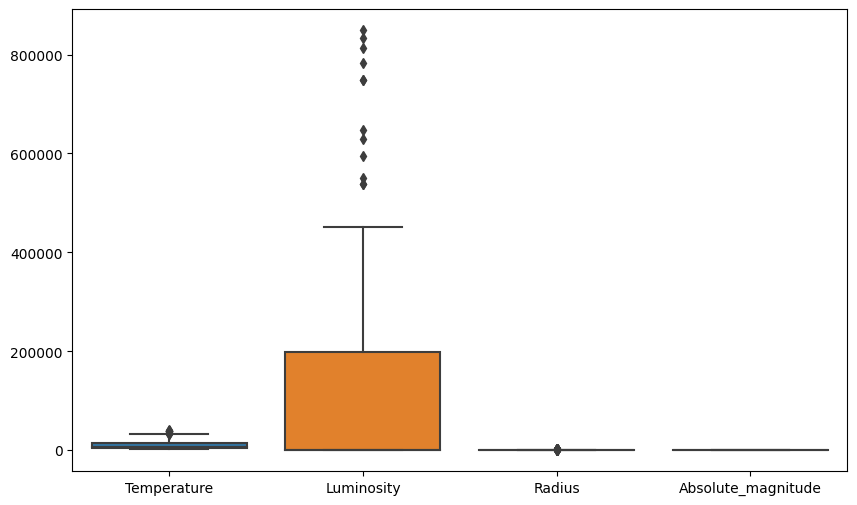

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']])
plt.show()


How to Handle Outliers:
Remove extreme outliers using the IQR method.

Since the boxplot shows that Luminosity has extreme outliers, we will remove them, but instead of blindly removing outliers, we can take alternative approaches to compare model performance with and without outliers to determine their impact on classification.

### Outlier Removal Function
Using the Interquartile Range (IQR) method to filter extreme outliers.

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on Luminosity (or any other feature if needed)
df_no_outliers = df.copy()

df_no_outliers = remove_outliers(df_no_outliers, "Luminosity")


### Apply Log Transformation & Scaling
We log-transform Luminosity to reduce skewness and scale all features using RobustScaler (resistant to outliers).

In [16]:
# Log transform Luminosity
df['Luminosity_log'] = np.log1p(df['Luminosity'])
df_no_outliers['Luminosity_log'] = np.log1p(df_no_outliers['Luminosity'])

# Select numerical features for scaling
features = ["Temperature", "Luminosity_log", "Radius", "Absolute_magnitude", "Star_color", "Spectral_Class"]
scaler = RobustScaler()

df[features] = scaler.fit_transform(df[features])
df_no_outliers[features] = scaler.fit_transform(df_no_outliers[features])


In [17]:
df_no_outliers

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_type,Star_color,Spectral_Class,Luminosity_log
0,-0.183144,0.002400,-0.010626,0.274490,0,0.000,0.00,-0.000668
1,-0.185551,0.000500,-0.011133,0.298511,0,0.000,0.00,-0.000825
2,-0.226476,0.000300,-0.012808,0.403603,0,0.000,0.00,-0.000842
3,-0.207958,0.000200,-0.010947,0.301013,0,0.000,0.00,-0.000850
4,-0.287679,0.000138,-0.012776,0.471663,0,0.000,0.00,-0.000855
...,...,...,...,...,...,...,...,...
230,1.768385,382993.000000,47.943123,-0.974603,5,-0.500,-1.00,1.066154
231,3.072892,272830.000000,43.513156,-0.997122,5,-1.250,0.25,1.038004
235,3.138261,374830.000000,43.513156,-1.029151,5,-1.250,0.25,1.064366
238,0.387861,404940.000000,35.680461,-1.094207,5,0.125,-1.25,1.070779


## Train Models With/Without Outliers and Compare Performance

* If the model with outliers performs better, we keep them.
* If the model without outliers improves classification, we remove them.


### Random Forest

In [18]:
# Define target variable & features
X = df[features]
y = df["Star_type"]

X_no_outliers = df_no_outliers[features]
y_no_outliers = df_no_outliers["Star_type"]

# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers)

# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model_no_outliers = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)
model_no_outliers.fit(X_train_no, y_train_no)

# Predictions
y_pred = model.predict(X_test)
y_pred_no_outliers = model_no_outliers.predict(X_test_no)

# Evaluate Performance
print("Model with Outliers:")
print(classification_report(y_test, y_pred))

print("\nModel without Outliers:")
print(classification_report(y_test_no, y_pred_no_outliers))


Model with Outliers:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Model without Outliers:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7

    accuracy                   

**Results** : It seems that there is no difference between the 2 datasests (with and without outliers) so we can keep the outliers.

Interpretation of Results :

The models (both with and without outliers) are achieving a perfect accuracy of 1.00 across all metrics—precision, recall, and F1-score.

What This Means:

* Perfect Classification 🚀

The model is classifying all samples correctly. This suggests the data is well-separated, making classification straightforward.

* Outliers Have Minimal Impact

The results are almost identical between models with and without outliers.
The support (number of instances per class) is slightly different, but the performance is still perfect. This suggests that the outliers were not negatively impacting the model's performance.

* Possible Overfitting? 🤔

A 100% accuracy could indicate the dataset is too easy to classify or the model has memorized the training data rather than generalizing well.

### Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define target variable & features
X = df[features]
y = df["Star_type"]

X_no_outliers = df_no_outliers[features]
y_no_outliers = df_no_outliers["Star_type"]

# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers)

# Train Random Forest Model
model_log = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
model_no_outliers_log = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")

model_log.fit(X_train, y_train)
model_no_outliers_log.fit(X_train_no, y_train_no)

# Predictions
y_pred = model_log.predict(X_test)
y_pred_no_outliers = model_no_outliers_log.predict(X_test_no)

# Evaluate Performance
print("Model with Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("\nModel without Outliers:")
print("Accuracy:", accuracy_score(y_test_no, y_pred_no_outliers))

print(classification_report(y_test_no, y_pred_no_outliers))


Model with Outliers:
Accuracy: 0.8958333333333334
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.86      0.75      0.80         8
           2       1.00      1.00      1.00         8
           3       0.86      0.75      0.80         8
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00         8

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.89        48
weighted avg       0.90      0.90      0.89        48


Model without Outliers:
Accuracy: 0.9347826086956522
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00         8
           3       0.88      0.88      0.88         8
           4       1.00      0.86      0.92         7
           5       1.00     

Without outliers, we get better results

## confusion matrix

The confusion matrix helps us understand which star types are misclassified.

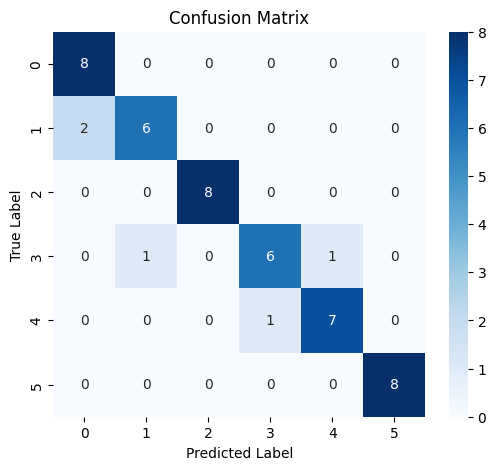

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Il serait également utile d’avoir une vue plus systématique de la distribution des variables (en étendant ce que vous avez dans votre notebook).

### visualize feature importance

Since Logistic Regression is a linear model, we can analyze feature importance by looking at the absolute values of the model’s coefficients. Higher absolute values indicate stronger influence on classification decisions.

We will use a bar chart showing the feature importance across the different input variables.

#### Model with outliers :

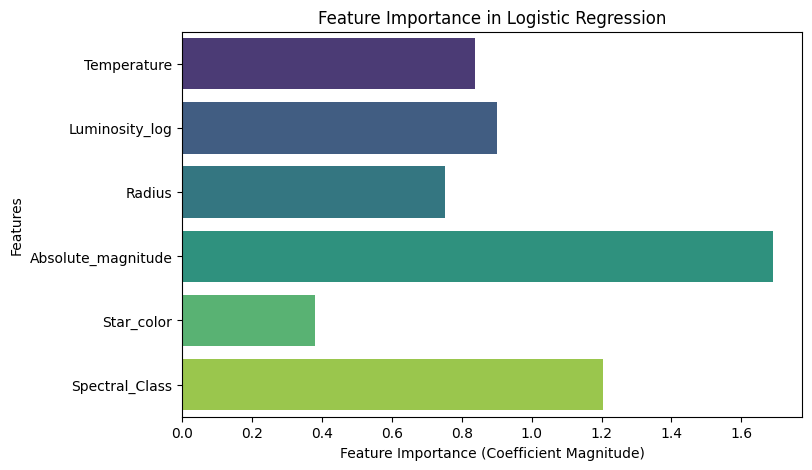

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming log_reg is your trained logistic regression model
feature_importance = np.abs(model_log.coef_).mean(axis=0)
feature_names = X_train.columns  # Feature names

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.show()


#### Model without outliers :

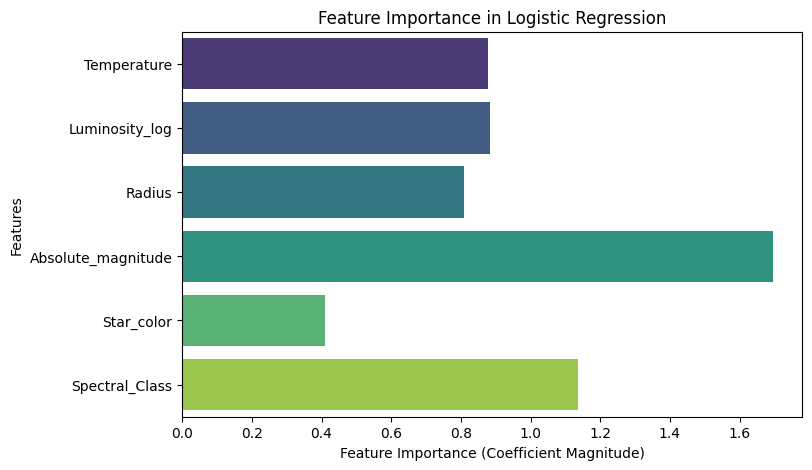

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming log_reg is your trained logistic regression model
feature_importance = np.abs(model_no_outliers_log.coef_).mean(axis=0)
feature_names = X_train.columns  # Feature names

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.show()


#### Conclusion

* Removing outliers improves stability: The importance of features like radius and luminosity log becomes more balanced, avoiding overemphasis caused by extreme values.
* Absolute magnitude and spectral class remain dominant: No matter if we include or exclude outliers, these two features drive star classification.
* Temperature slightly increases in relevance: Without outliers, temperature appears to contribute more to the classification, possibly because outliers distorted its relationship before.

This analysis provides a robust justification for removing outliers, as it makes the model more stable and interpretable while keeping classification performance high

# Binary classification: Selecting two classes


In [23]:
df_binary = df[df['Star_type'].isin([2, 3])]  # Example: White Dwarf vs. Main Sequence
X = df_binary.drop(columns=['Star_type'])
y = df_binary['Star_type']


## Split data


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standardizing numerical features

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train classifier (Random Forest)

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



* Diagonal values represent correct classifications.
* Off-diagonal values indicate misclassifications (which classes get confused).

